In [3]:
import pandas as pd
import numpy as np

efficient_b = pd.read_csv('data/efficient_b_labelling_soundscape.csv')

efficient = pd.read_csv('data/train_soundscapes_complete_proc_eff.csv')
yamnet = pd.read_csv('data/train_soundscapes_complete_proc_yamn.csv')

# indices
index_filter = np.arange(5, len(efficient), 12)
efficient = efficient.iloc[index_filter].copy().reset_index(drop=True)
yamnet = yamnet.iloc[index_filter].copy().reset_index(drop=True)

In [4]:
taxonomy_df = pd.read_csv('data/taxonomy.csv')
class_names = taxonomy_df['primary_label'].tolist()

In [12]:
merged = pd.read_csv('data/train_soundscapes.csv')
merged['efficient'] = efficient[efficient.columns[-1]].apply(lambda p: class_names[p-1])
merged['efficient_b'] = efficient_b['prediction']

merged = merged[merged.columns[1:]]


cols = list(merged.columns)
cols[1], cols[-1] = "file", "primary_label"
merged.columns = cols

In [13]:
merged

,filename,file,duration,sample_rate,channels,bitrate,file_size,efficient,primary_label
0,H21_20230510_051500.ogg,H21_20230510_051500,60.0,32000,1,72,466860,whtdov,thlsch3
1,H92_20230516_183000.ogg,H92_20230516_183000,60.0,32000,1,72,491965,roahaw,compau
2,H06_20230422_195500.ogg,H06_20230422_195500,60.0,32000,1,72,474773,21038,compot1
3,O201_20230522_191000.ogg,O201_20230522_191000,60.0,32000,1,72,492253,whtdov,compot1
4,O201_20230519_041500.ogg,O201_20230519_041500,60.0,32000,1,72,497865,solsan,compot1
...,...,...,...,...,...,...,...,...,...
9721,H03_20230424_195500.ogg,H03_20230424_195500,60.0,32000,1,72,472634,whtdov,speowl1
9722,H93_20230430_233000.ogg,H93_20230430_233000,60.0,32000,1,72,495270,roahaw,compot1
9723,O202_20230522_000500.ogg,O202_20230522_000500,60.0,32000,1,72,494012,whtdov,compot1
9724,H94_20230505_215500.ogg,H94_20230505_215500,60.0,32000,1,72,474657,tropar,compot1


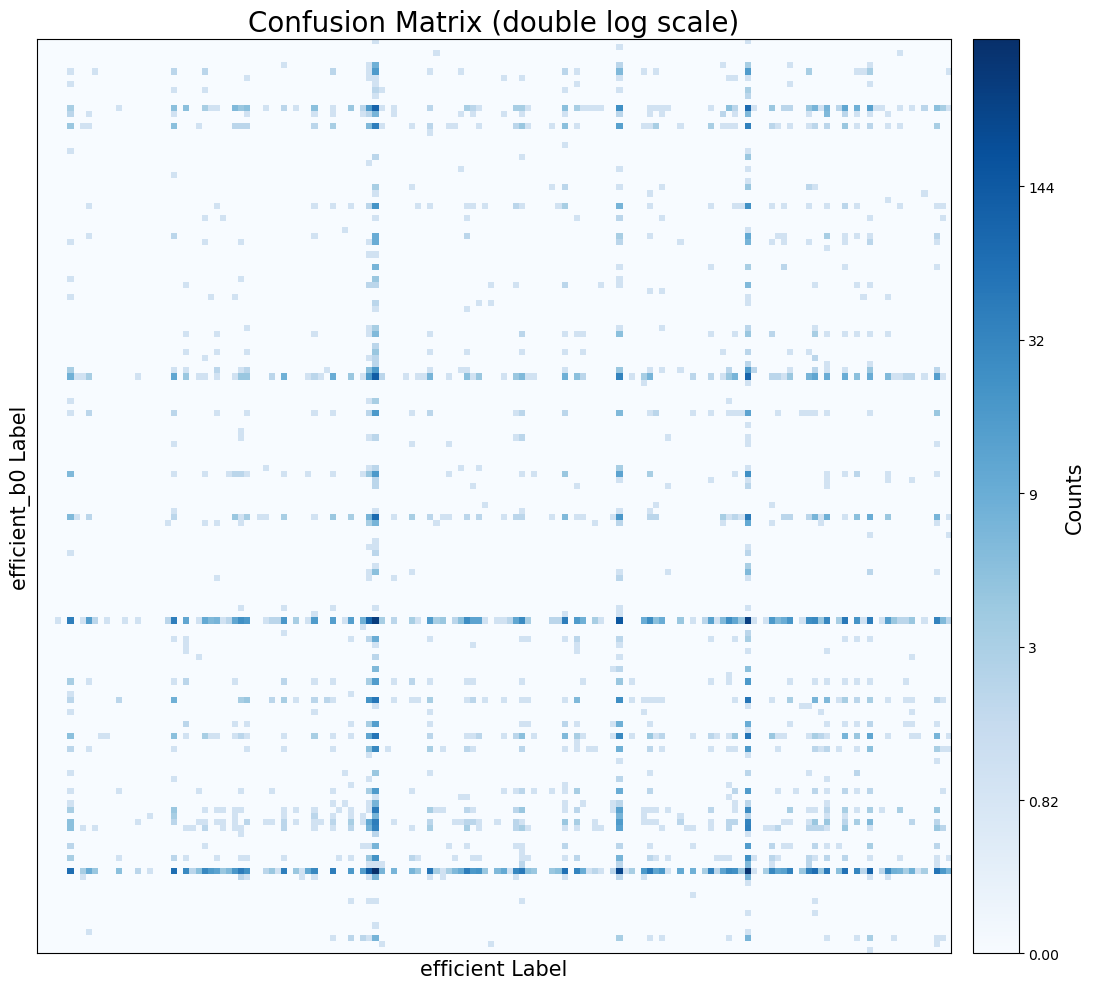

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import confusion_matrix

# Assume merged is your DataFrame with 'true' and 'pred' columns
true_labels = merged['efficient']
pred_labels = merged['efficient_b']

# Get sorted unique labels to ensure consistent ordering
labels = sorted(list(set(true_labels) | set(pred_labels)))
display_labels = labels  # You can customize this if you want prettier display names

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels, labels=labels)

# Double log transform for better visualization
conf_log = np.log10(np.log10(conf_matrix + 1) + 1)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
plt.imshow(conf_log, interpolation='nearest', cmap='Blues')
plt.xticks([])
plt.yticks([])

# Define the inverse transform for the color bar
def inverse_double_log(x, pos):
    val = 10**(10**x - 1) - 1
    if val >= 1000:
        return f"{int(val):,}"
    elif val >= 1:
        return f"{val:.0f}"
    else:
        return f"{val:.2f}"

# Add color bar with inverse scale labels
cbar = plt.colorbar(fraction=0.05, pad=0.02)
cbar.set_label("Counts", fontsize=15)
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(inverse_double_log))

# Labels and title
plt.title("Confusion Matrix (double log scale)", fontsize=20)
plt.xlabel("efficient Label", fontsize=15)
plt.ylabel("efficient_b0 Label", fontsize=15)
plt.tight_layout()
plt.show()


In [17]:
merged.to_csv('train_soundscapes.csv', index=False)